# Prepare run

Given that the original GBM data are under restricted access, this notebook includes only the visualization steps of the cisTopic analysis. For more information on the followed workflow, see the corresponding Methods section and the [pycisTopic tutorial](https://pycistopic.readthedocs.io/en/latest/tutorials.html).

## Import libraries and functions

In [ ]:
import os
import io
import gc
import ray
import glob
import pickle
import numpy as np
import polars as pl
import pandas as pd
import seaborn as sns
from PIL import Image
import pyranges as pr
import scrublet as scr
import pybiomart as pbm
from pathlib import Path
import matplotlib.pyplot as plt
from cistopic_utils import plot_metadata_custom, plot_topic_custom

## Setup directories

Download the data for the notebooks from the dedicated Zenodo link of the CREsted paper. Then use it below.

In [ ]:
data_dir = Path("../../../crested_data/Figure_4/cistopic")

## Visualization of samples, topics and cell states (Figure 4f & S11a)

Load sample/cell annotations and cell-topic distributions

In [18]:
with open(data_dir.joinpath(Path('cistopic_obj_projections.pkl')), 'rb') as f:
    cistopic_obj_projections = pickle.load(f)

cistopic_obj_cell_data = pd.read_csv(data_dir.joinpath(Path('cell_data.csv')), index_col=0)
cistopic_obj_cell_topic = pd.read_csv(data_dir.joinpath(Path('cell_topic.csv')), index_col=0)

Define a color-variable dictionary

In [19]:
colVars= {
    'cell_type_state': {
        'OPC/NPC-like': '#1f77b4',
        'AC/MES-like': '#aec7e8',
        'MES-like': '#ff7f0e'
    },
    'sample_id': {
        'SF11949': '#2ca02c',
        'SF11612': '#1f77b4',
        'SF11979': '#d62728',
        'SF11964': '#ff9896',
        'SF12017': '#9467bd',
        'SF11956': '#c5b0d5'
    }
}

Samples and cell states

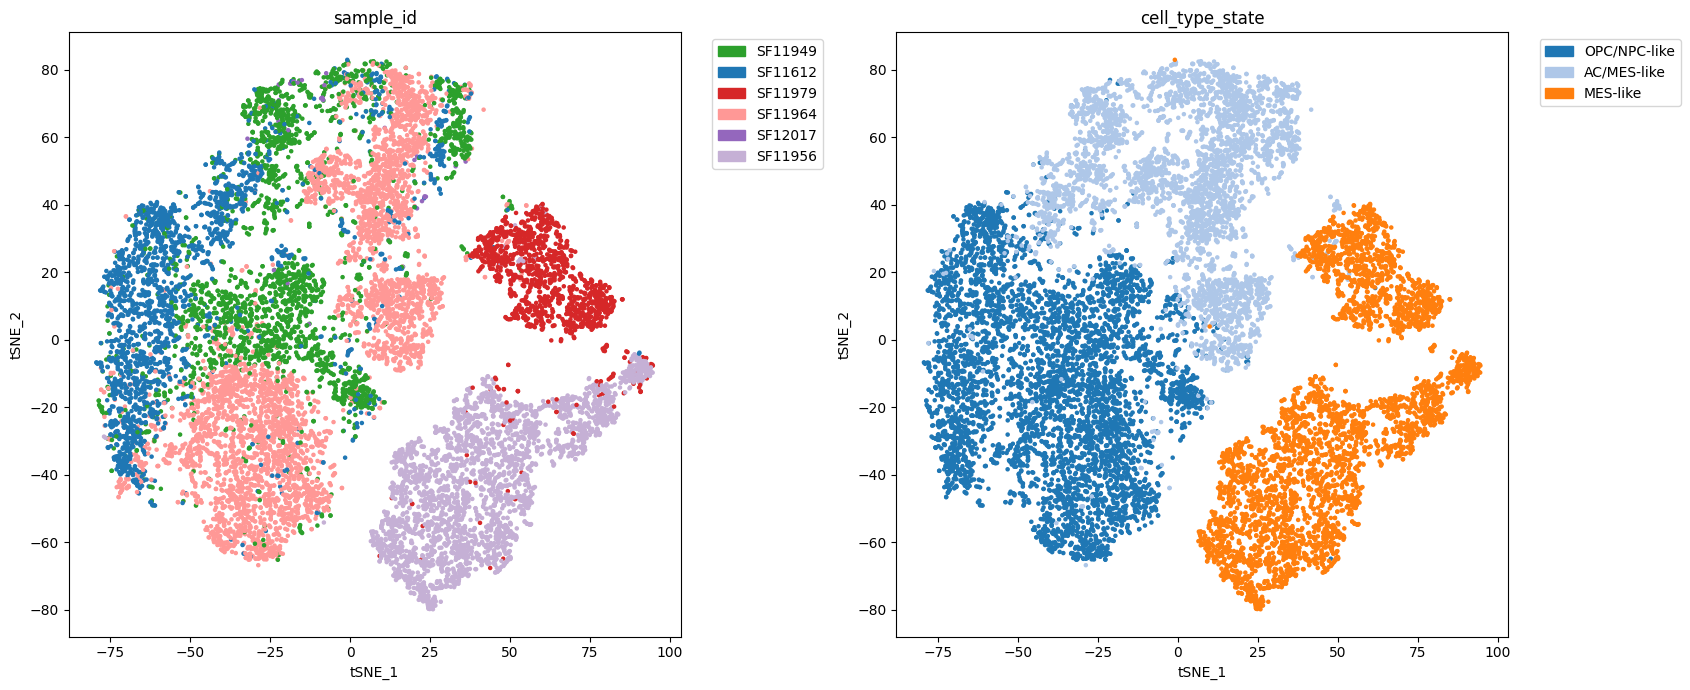

In [20]:
plot_metadata_custom(
    cistopic_obj_projections,
    cistopic_obj_cell_data,
    color_dictionary=colVars,
    reduction_name='harmony_scaled_tSNE',
    variables=['sample_id', 'cell_type_state'],
    target='cell',
    num_columns=2,
    figsize=(17, 7),
    text_size=10,
    dot_size=5,
    show_label=False,
    show_legend=True
)

Topics

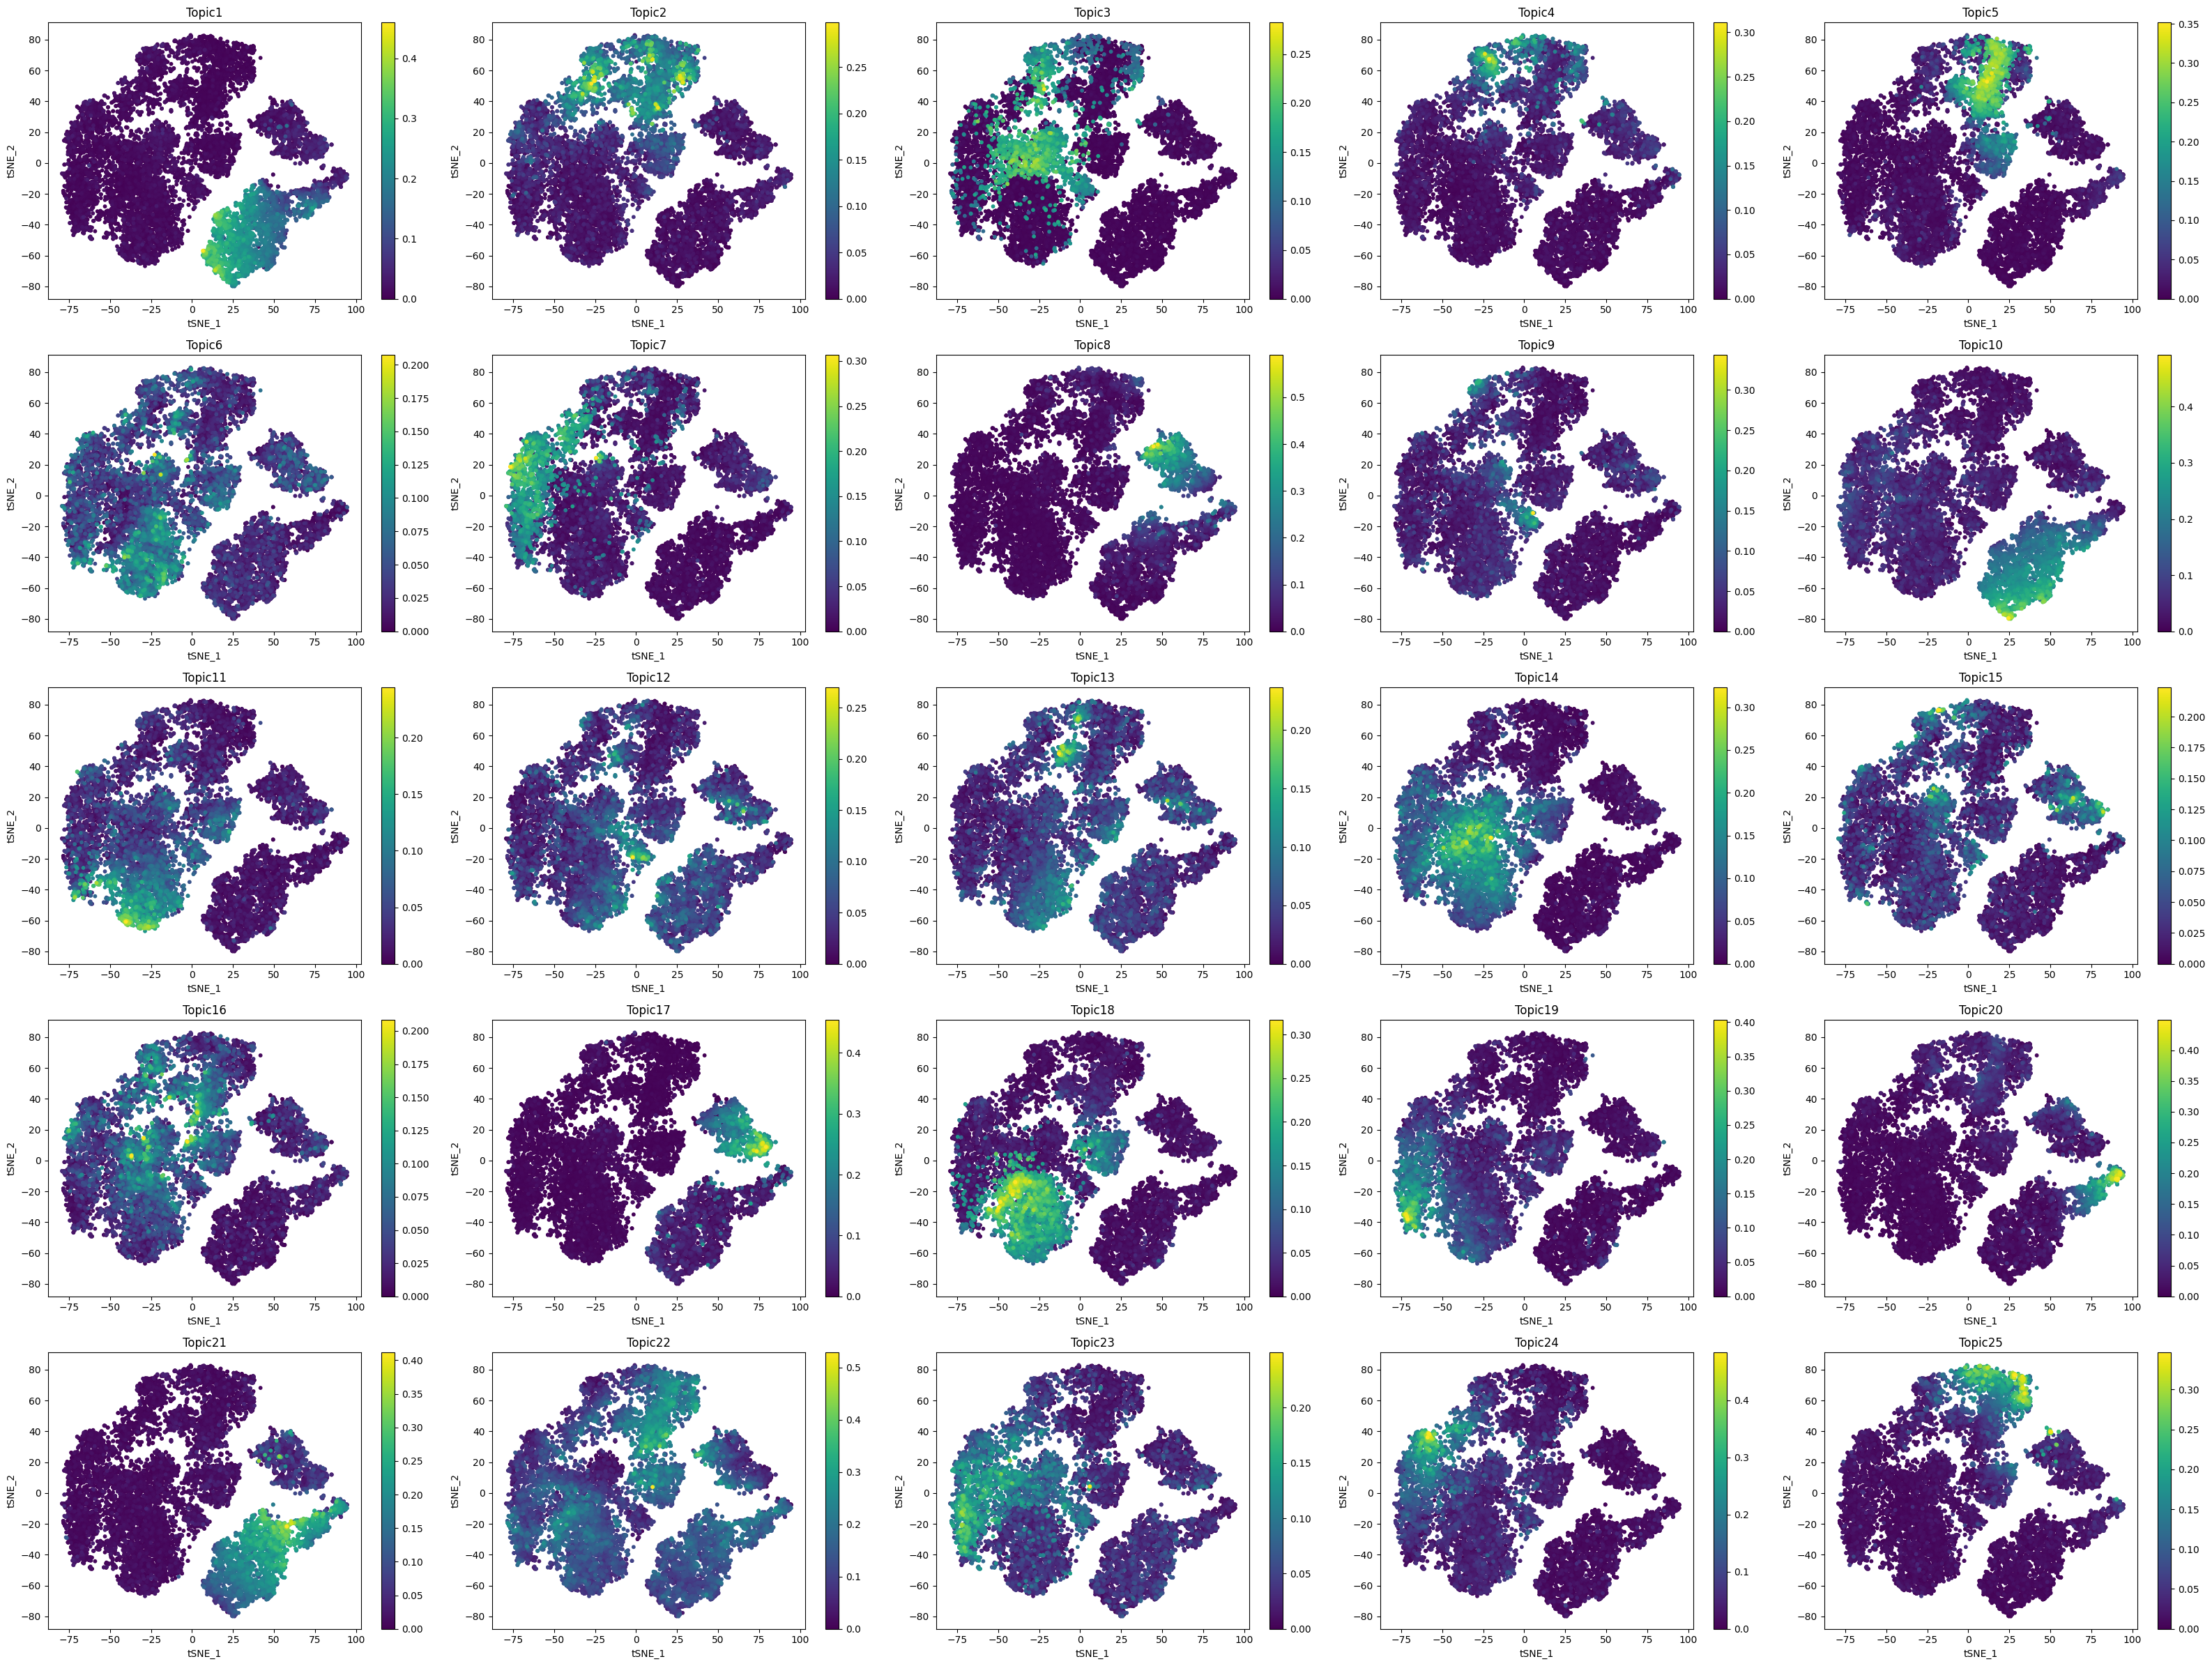

In [21]:
plot_topic_custom(
    cistopic_obj_projections,
    cistopic_obj_cell_topic,
    reduction_name='harmony_scaled_tSNE',
    target='cell',
    num_columns=5,
)